### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships: Correlations, Scatterplots, Pair Plots, Categorical Plots
#### 4. Project Questions and Hypotheses

### 1. Importing Visualization Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version.

matplotlib.__version__

'3.7.2'

In [3]:
# This option ensures the charts are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path.

path = r'C:\Users\danie\Desktop\CareerFoundry\Achievement 6-Personal Project'
path

'C:\\Users\\danie\\Desktop\\CareerFoundry\\Achievement 6-Personal Project'

In [5]:
# Import data.

df = pd.read_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Data_Cleaned_1.csv'))

### 2. Data Cleaning

#### Missing Values

In [6]:
# Check for missing values.

df.isnull().sum() # No missing values found.

Unnamed: 0              0
INSPECTION_TYPE         0
JOB_PROGRESS            0
BORO_CODE               0
HOUSE_NUMBER            0
STREET_NAME             0
ZIP_CODE                0
X_COORD                 0
Y_COORD                 0
LATITUDE                0
LONGITUDE               0
BOROUGH                 0
INSPECTION_DATE         0
RESULT                  0
LOCATION                0
COMMUNITY BOARD         0
COUNCIL DISTRICT        0
CENSUS TRACT            0
NEIGHBORHOOD            0
inspection_year         0
inspection_year_flag    0
dtype: int64

#### Duplicates

In [7]:
# Find duplicates.

df_dups = df[df.duplicated()]

In [8]:
df_dups.shape # No duplicates found.

(0, 21)

#### Mixed-Type Data

In [9]:
# Check data types.

df.dtypes

Unnamed: 0                int64
INSPECTION_TYPE          object
JOB_PROGRESS              int64
BORO_CODE                 int64
HOUSE_NUMBER             object
STREET_NAME              object
ZIP_CODE                float64
X_COORD                 float64
Y_COORD                 float64
LATITUDE                float64
LONGITUDE               float64
BOROUGH                  object
INSPECTION_DATE          object
RESULT                   object
LOCATION                 object
COMMUNITY BOARD         float64
COUNCIL DISTRICT        float64
CENSUS TRACT            float64
NEIGHBORHOOD             object
inspection_year           int64
inspection_year_flag     object
dtype: object

In [30]:
# Check for mixed-type data.

for col in df.columns.tolist():
      weird = (df[[col]].map(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col) # No mixed-type data found.

#### Pick out variables necessary for exploratory visual analysis.

In [31]:
# Remove variables unnecessary for visual analysis/correlations.

df_1 = df.drop(columns = ['Unnamed: 0','HOUSE_NUMBER','STREET_NAME','X_COORD','Y_COORD','inspection_year_flag'])

In [32]:
# Check output.

df_1

,INSPECTION_TYPE,JOB_PROGRESS,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year
0,Initial,1,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016
1,Initial,1,2,10457.0,40.845931,-73.896556,Bronx,2016-11-29 16:07:06,Passed,"(40.845930919837, -73.896555813219)",6.0,15.0,395.0,Tremont,2016
2,Initial,1,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014
3,Initial,1,2,10458.0,40.873780,-73.885892,Bronx,2023-02-02 14:50:46,Passed,"(40.873779859166, -73.885892352785)",7.0,11.0,413.0,Bedford Park,2023
4,Initial,1,1,10009.0,40.728739,-73.981585,Manhattan,2019-04-04 09:57:25,Passed,"(40.728739451411, -73.98158466403)",3.0,2.0,34.0,East Village,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908362,Compliance,2,3,11211.0,40.707009,-73.951506,Brooklyn,2023-05-26 12:10:32,Rat Activity,"(40.707008581511, -73.951506038819)",1.0,34.0,527.0,Williamsburg,2023
1908363,Initial,1,3,11221.0,40.693240,-73.934099,Brooklyn,2018-10-24 08:18:18,Passed,"(40.693240354692, -73.934098663565)",3.0,36.0,289.0,Bedford-Stuyvesant (East),2018
1908364,Initial,1,3,11216.0,40.681242,-73.941610,Brooklyn,2019-10-08 12:30:42,Rat Activity,"(40.681241527023, -73.941609885172)",3.0,36.0,269.0,Bedford-Stuyvesant (West),2019
1908365,Initial,1,2,10468.0,40.860442,-73.902140,Bronx,2018-05-08 13:46:46,Passed,"(40.860441730285, -73.902140323668)",5.0,14.0,239.0,Fordham Heights,2018


In [33]:
# Derive inspection date from INSPECTION_DATE.

df_1['inspection_month'] = pd.DatetimeIndex(df_1['INSPECTION_DATE']).month

In [34]:
# Check output.

df_1

,INSPECTION_TYPE,JOB_PROGRESS,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,LOCATION,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,NEIGHBORHOOD,inspection_year,inspection_month
0,Initial,1,2,10451.0,40.826932,-73.925286,Bronx,2016-09-26 13:10:25,Passed,"(40.826932154585, -73.925286438191)",4.0,16.0,6301.0,Concourse-Concourse Village,2016,9
1,Initial,1,2,10457.0,40.845931,-73.896556,Bronx,2016-11-29 16:07:06,Passed,"(40.845930919837, -73.896555813219)",6.0,15.0,395.0,Tremont,2016,11
2,Initial,1,1,10031.0,40.822391,-73.946768,Manhattan,2014-09-03 10:12:14,Passed,"(40.822390591115, -73.946767934183)",9.0,9.0,227.0,Hamilton Heights-Sugar Hill,2014,9
3,Initial,1,2,10458.0,40.873780,-73.885892,Bronx,2023-02-02 14:50:46,Passed,"(40.873779859166, -73.885892352785)",7.0,11.0,413.0,Bedford Park,2023,2
4,Initial,1,1,10009.0,40.728739,-73.981585,Manhattan,2019-04-04 09:57:25,Passed,"(40.728739451411, -73.98158466403)",3.0,2.0,34.0,East Village,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908362,Compliance,2,3,11211.0,40.707009,-73.951506,Brooklyn,2023-05-26 12:10:32,Rat Activity,"(40.707008581511, -73.951506038819)",1.0,34.0,527.0,Williamsburg,2023,5
1908363,Initial,1,3,11221.0,40.693240,-73.934099,Brooklyn,2018-10-24 08:18:18,Passed,"(40.693240354692, -73.934098663565)",3.0,36.0,289.0,Bedford-Stuyvesant (East),2018,10
1908364,Initial,1,3,11216.0,40.681242,-73.941610,Brooklyn,2019-10-08 12:30:42,Rat Activity,"(40.681241527023, -73.941609885172)",3.0,36.0,269.0,Bedford-Stuyvesant (West),2019,10
1908365,Initial,1,2,10468.0,40.860442,-73.902140,Bronx,2018-05-08 13:46:46,Passed,"(40.860441730285, -73.902140323668)",5.0,14.0,239.0,Fordham Heights,2018,5


In [35]:
# Export updated df_1 to csv.

df_1.to_csv(os.path.join(path, '02-2024 NYC Rats', '02 Data', 'Prepared Data', 'Data_Cleaned_2.csv'))

In [36]:
# Remove non-numerical variables for correlation matrix.

df_2 = df_1.drop(columns = ['INSPECTION_TYPE','BOROUGH','INSPECTION_DATE','RESULT','LOCATION','NEIGHBORHOOD'])

In [37]:
# Check output.

df_2

,JOB_PROGRESS,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,inspection_year,inspection_month
0,1,2,10451.0,40.826932,-73.925286,4.0,16.0,6301.0,2016,9
1,1,2,10457.0,40.845931,-73.896556,6.0,15.0,395.0,2016,11
2,1,1,10031.0,40.822391,-73.946768,9.0,9.0,227.0,2014,9
3,1,2,10458.0,40.873780,-73.885892,7.0,11.0,413.0,2023,2
4,1,1,10009.0,40.728739,-73.981585,3.0,2.0,34.0,2019,4
...,...,...,...,...,...,...,...,...,...,...
1908362,2,3,11211.0,40.707009,-73.951506,1.0,34.0,527.0,2023,5
1908363,1,3,11221.0,40.693240,-73.934099,3.0,36.0,289.0,2018,10
1908364,1,3,11216.0,40.681242,-73.941610,3.0,36.0,269.0,2019,10
1908365,1,2,10468.0,40.860442,-73.902140,5.0,14.0,239.0,2018,5


### 3. Exploring Relationships

#### Correlations

In [38]:
# Create a correlation matrix using pandas.

df_2.corr()

,JOB_PROGRESS,BORO_CODE,ZIP_CODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,inspection_year,inspection_month
JOB_PROGRESS,1.000000,0.000584,0.010986,0.001290,-0.023618,-0.047636,0.004049,-0.002781,0.047955,0.001831
BORO_CODE,0.000584,1.000000,0.836114,-0.565914,0.133218,-0.166035,0.860579,0.140096,0.027320,0.011751
ZIP_CODE,0.010986,0.836114,1.000000,-0.544175,0.360226,-0.037042,0.828107,0.116261,0.070586,0.015380
LATITUDE,0.001290,-0.565914,-0.544175,1.000000,0.415983,0.116693,-0.690559,0.035712,-0.065389,0.019027
LONGITUDE,-0.023618,0.133218,0.360226,0.415983,1.000000,0.315088,-0.029626,0.189503,-0.022999,0.034100
COMMUNITY BOARD,-0.047636,-0.166035,-0.037042,0.116693,0.315088,1.000000,-0.022759,0.082764,0.037368,0.038077
COUNCIL DISTRICT,0.004049,0.860579,0.828107,-0.690559,-0.029626,-0.022759,1.000000,0.074117,0.067356,0.012888
CENSUS TRACT,-0.002781,0.140096,0.116261,0.035712,0.189503,0.082764,0.074117,1.000000,-0.019504,-0.000634
inspection_year,0.047955,0.027320,0.070586,-0.065389,-0.022999,0.037368,0.067356,-0.019504,1.000000,-0.028006
inspection_month,0.001831,0.011751,0.015380,0.019027,0.034100,0.038077,0.012888,-0.000634,-0.028006,1.000000


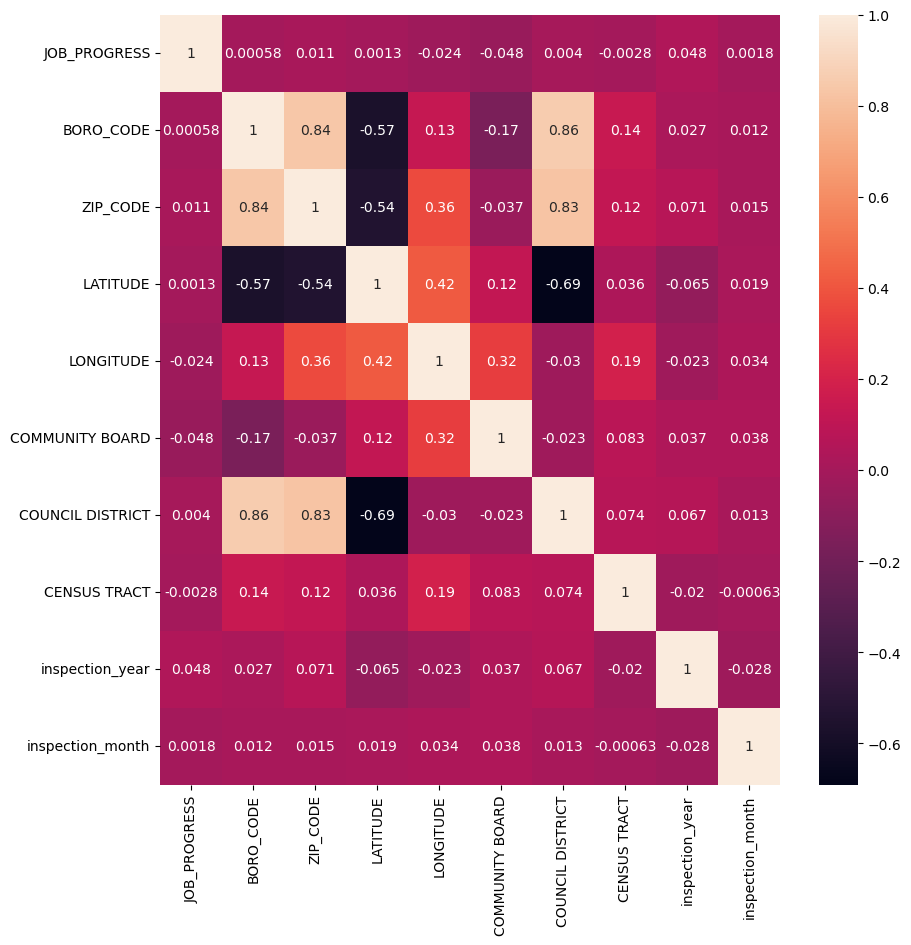

In [39]:
# Create a subplot with matplotlib.

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(df_2.corr(), annot = True, ax = ax)

The above correlation heatmap indicates that the strongest correlations between differing variables are location-based, which is to be expected. Council district and borough codes are strongly correlated with zip code, and correlation coefficients indicating moderate relationships include longitude with latitude and longitude with zip code. The majority of correlation coefficients indicate a weak relationship, especially census tract with inspection month.

#### Scatterplots

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


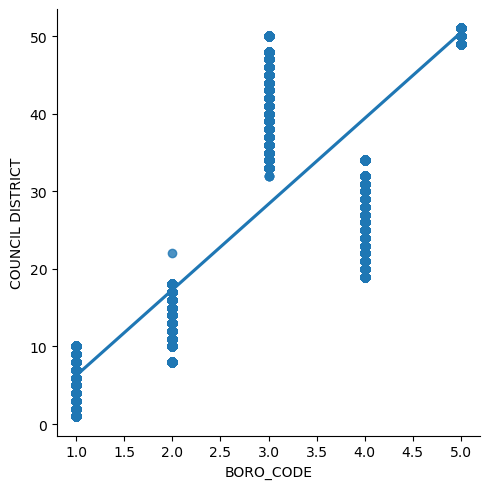

In [40]:
# Create a scatterplot for the strongest correlation coefficient: "BORO_CODE" and "COUNCIL DISTRICT" columns in seaborn.

sns.lmplot(x = 'BORO_CODE', y = 'COUNCIL DISTRICT', data = df_2)

In [41]:
# Check value counts for BORO_CODE.

df['BORO_CODE'].value_counts(dropna=False)

BORO_CODE
1    610685
2    561065
3    495774
4    190264
5     50579
Name: count, dtype: int64

In [42]:
# Check value counts for BOROUGH to correspond names for markdown below.

df['BOROUGH'].value_counts(dropna=False)

BOROUGH
Manhattan        610685
Bronx            561065
Brooklyn         495774
Queens           190264
Staten Island     50579
Name: count, dtype: int64

The above strange-looking scatterplot shows the 5 borough codes correlating to council districts. Borough Code 1 (Manhattan) is included in Council District numbers 0 to 11. Borough Code 3 (Brooklyn) is included in the largest number of Council Districts ranging from 30 to 50, and Borough Code 5 (Staten Island) is included in the smallest number of Council Districts.

#### Pair Plots

In [49]:
# Keep only the variables to use in the pair plot.

sub = df_2[['JOB_PROGRESS', 'BORO_CODE', 'inspection_year', 'inspection_month']]

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

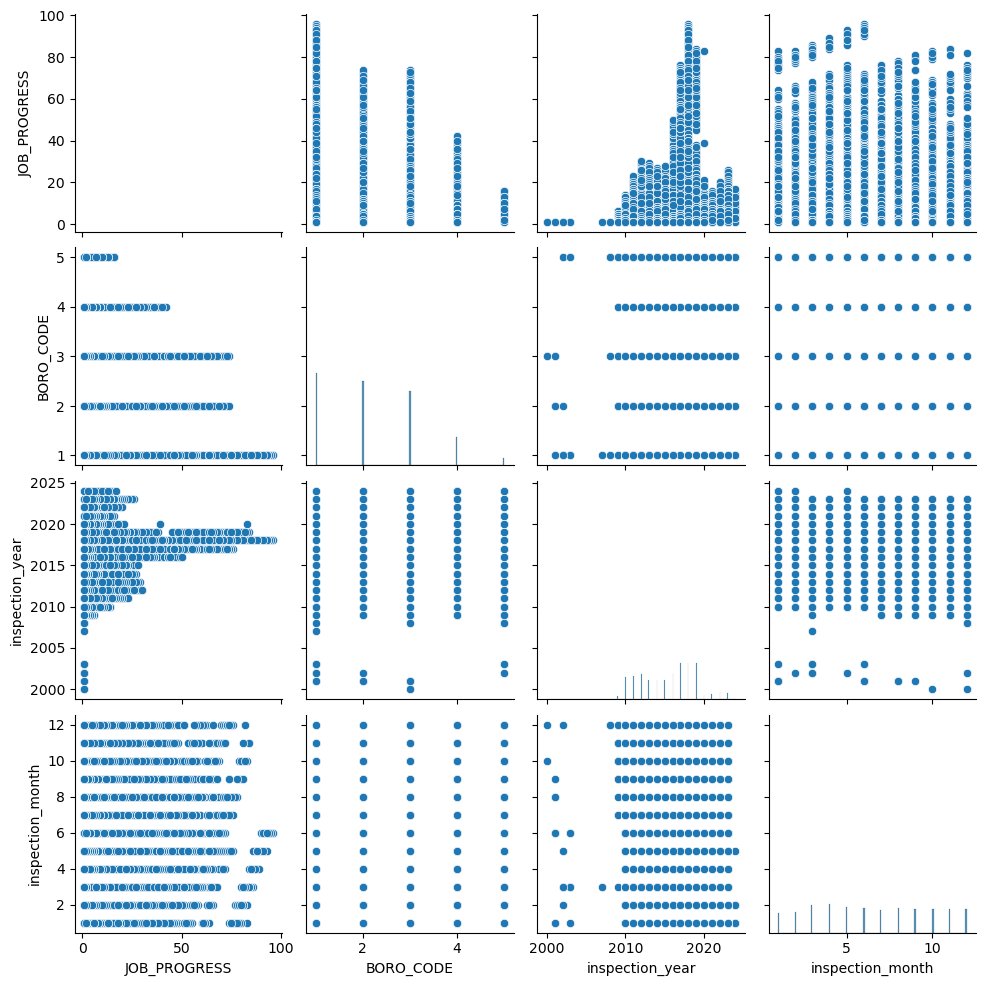

In [50]:
# Create a pair plot.

g = sns.pairplot(sub)

The variables "BORO_CODE" and "inspection_year" indicate a greater amount of data collected from 2005 onward. The variables "BORO_CODE" and "inspection_month" appear to illustrate a steady distribution of insepctions throughout the year, but I would like to zoom in and plot these variables on a histogram to get a better sense of how inspections vary by borough. I would also like to examine "JOB_PROGRESS" plotted with "inspection_year" as a histogram. The initial pair plot shows a steady increase in inspections that peaked in 2018 before a sudden drop-off in the 2020 coronavirus pandemic, and I'd like to know how the most recent calendar year's (2023) inspection numbers compare to pre-pandemic years. I'd also like to examine "JOB_PROGRESS" by "BORO_CODE." Since job progress numbers multiple inspections for a single site, I'd like to break job progress numbers into categories to get a better understanding of repeat inspections by borough.

#### Categorical Plots

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='JOB_PROGRESS', ylabel='Count'>

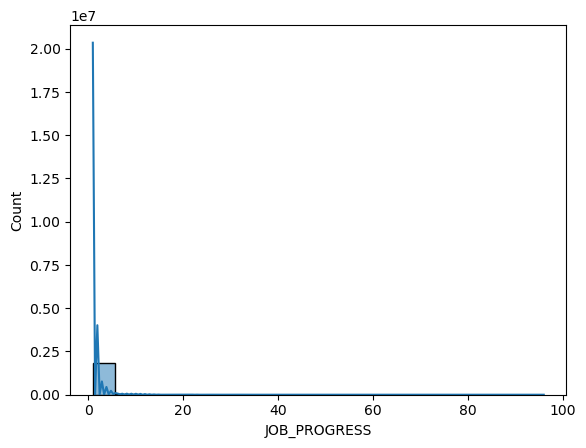

In [71]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" adds a line that encompasses the distribution.

sns.histplot(df_1['JOB_PROGRESS'], bins = 20, kde = True)

In [84]:
# Find JOB_PROGRESS range.

df_1['JOB_PROGRESS'].min()

1

In [85]:
df_1['JOB_PROGRESS'].max()

96

In [87]:
# Create JOB_PROGRESS categories for categorical plot.

df_1.loc[df_1['JOB_PROGRESS'] < 10, 'Single-site Inspections Category'] = 'Less than 10 inspections'

In [88]:
df_1.loc[(df_1['BORO_CODE'] >= 10) & (df_1['JOB_PROGRESS'] < 20), 'Single-site Inspections Category'] = '10-20 inspections'

In [89]:
df_1.loc[df_1['JOB_PROGRESS'] >= 20, 'Single-site Inspections Category'] = '20+ inspections'

In [90]:
# Check value counts for 'Single-site Inspections Category' column.

df_1['Single-site Inspections Category'].value_counts(dropna = False)

Single-site Inspections Category
Less than 10 inspections    1886225
10-20 inspections             17854
20+ inspections                4288
Name: count, dtype: int64

C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\danie\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

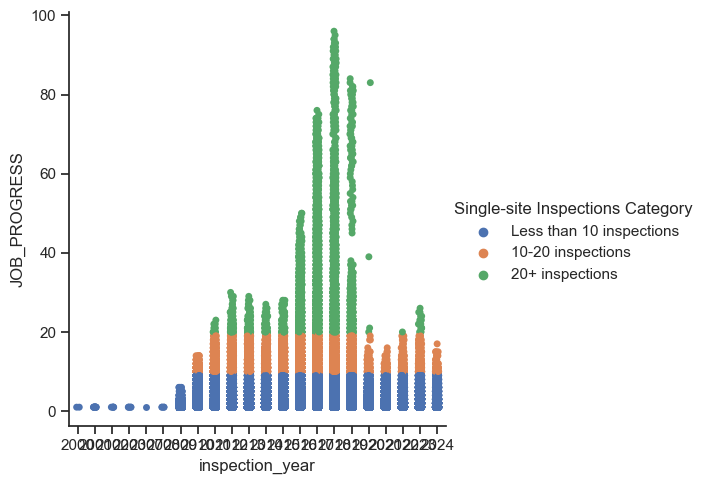

In [95]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="inspection_year", y="JOB_PROGRESS", hue="Single-site Inspections Category", data=df_1)

In [97]:
# fig = g.get_figure()
g.savefig("out.png") # Save image in working directory.

The categorical plot above shows that inspections increased significantly from 2013-2020 with the greatest amount of multiple visits per site.

### 4. Project Questions and Hypotheses

### Questions answered so far:
#### Which boroughs have the most inspections?
Manhattan has the most inspections, followed by Brooklyn and the Bronx.
#### In what years were the most inspections conducted? The least inspections?
Inspections increased and peaked in 2018 and dropped significantly after the 2020 pandemic. There were significantly fewer inspections before 2005.
#### In what months were the most inspections conducted?
Multiple inspections per site occured more frequently from January to June.

### Questions to be answered:   
 
#### What kind of inspection/call is the most common overall?
#### Are there certain kinds of inspections that occur in some boroughs more than others?
#### Is there a correlation between the number of inspections in a borough and its average cost of living?
#### How do 2023’s inspection numbers compare to pre-pandemic inspection numbers?
#### How do inspection results vary by borough?
#### Which boroughs have the most repeat visits per location?

### Hypotheses

#### If a location is centrally located/near Manhattan, then it will have more repeat rat inspections.